*Import Libraries*

In [11]:
import numpy as np
# import tensorflow as tf                                                       # print(tf.__version__)
from tensorflow import keras
from keras.datasets import fashion_mnist, mnist
import matplotlib.pyplot as plt

*Step 1. Load data*<br/>
Path data: C:\Users\name pc\.keras<br/>
[MNIST Dataset](https://www.tensorflow.org/datasets/catalog/mnist)<br>
[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)

In [12]:
name = 2                                                                        # 1:mnist; 2:fashion_mnist
if name==1:
    (x_train, y_train), (x_test, y_test) = mnist.load_data()                    # 70,000 28x28
else:
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()            # 70,000 28x28
print(f"x_train.shape:{x_train.shape}")                                         # (60000, 28, 28) = (Number of images, 28 , 28)
print(f"x_test.shape:{x_test.shape}")                                           # (10000, 28, 28) = (Number of images, 28 , 28)
print(f"y_train.shape:{y_train.shape}")                                         # (60000,) = (Number of label)
print(f"y_test.shape:{y_test.shape}")                                           # (10000,) = (Number of label)
print(f"y_train[:10]:{y_train}")                                                # Train labels
print(f"x_train[0,]: {x_train[0, 0:2, :]}")                                     # (Image 0, 0:2 out of 28, 28) ==> Ankle boot

x_train.shape:(60000, 28, 28)
x_test.shape:(10000, 28, 28)
y_train.shape:(60000,)
y_test.shape:(10000,)
y_train[:10]:[9 0 0 ... 3 0 5]
x_train[0,]: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


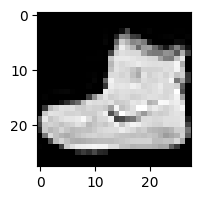

In [4]:
fig, ax = plt.subplots(figsize=(3, 2))
ax.imshow(x_train[0,], cmap="gray")

*Step 2. Normalize data*<br/>
pixel values between 0 and 255; Scale these values to a range of 0 to 1 before feeding them to the neural network model.

In [13]:
x_train, x_test = x_train/255.0, x_test/255.0    

**MLP**<br/>
*Step 3. Creating a Sequential model*<br/>
[Sequential model](https://keras.io/guides/sequential_model/)<br/>
[Dense layer](https://keras.io/api/layers/core_layers/dense/)<br/>
[Activation functions](https://keras.io/api/layers/activations/)<br/>
[Flatten layer](https://keras.io/api/layers/reshaping_layers/flatten/)<br/>

In [6]:
# Define Sequential model with 3 layers using 2 methods
method = 1
def building_model(x_train,units_layer1, units_layer2, units_output, fun_output, method):
    global model
    if method==1:
        model = keras.models.Sequential()
        model.add(keras.layers.Flatten(input_shape=x_train.shape[1:3]))         # Layer input : Input must be vectored; x_train.shape[1:3]:(28, 28)
        model.add(keras.layers.Dense(units_layer1, activation="relu"))          # Layer 1: The first hidden layer
        model.add(keras.layers.Dense(units_layer2, activation="relu"))          # Layer 2: The second hidden layer
        model.add(keras.layers.Dense(units_output, activation=fun_output))      # Layer output or 3: 10 neuron = 10 class; Multi classification then activation is softmax
    elif method==2:
        model = keras.models.Sequential([
            keras.layers.Flatten(input_shape=x_train.shape[1:3]),               # x_train.shape[1:3]:(28, 28)
            keras.layers.Dense(units_layer1,activation="relu"),
            keras.layers.Dense(units_layer2, activation="relu"),
            keras.layers.Dense(units_output, activation=fun_output)])
    return model
model= building_model(x_train,units_layer1=100, units_layer2=75, units_output=10, fun_output="softmax", method=2)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 75)                7575      
                                                                 
 dense_2 (Dense)             (None, 10)                760       
                                                                 
Total params: 86835 (339.20 KB)
Trainable params: 86835 (339.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


*Step 3.1: Print the model parameters*

In [11]:
model.layers

In [12]:
weights, bias = model.layers[1].get_weights()                                 # weights & bias in first layer
print(f"weights:{weights}; weights.shape: {weights.shape}")
print(f" bias: {bias}; bias.shape: {bias.shape}")

weights:[[ 0.02730298 -0.05291083  0.06527984 ...  0.00101852  0.00139856
   0.07334732]
 [-0.03837296  0.07046881 -0.02028779 ...  0.07168595  0.00346687
   0.07450236]
 [-0.07723099  0.01517205 -0.00132999 ...  0.03662054 -0.02643305
   0.08048522]
 ...
 [ 0.03575705  0.01041597 -0.00897413 ... -0.07564458 -0.0124782
   0.08074242]
 [-0.07428131 -0.00673175  0.000854   ... -0.05850188  0.03675956
  -0.02878123]
 [-0.06273768  0.05159065  0.05892892 ... -0.01255272 -0.05851714
  -0.03807701]]; weights.shape: (784, 100)
 bias: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]; bias.shape: (100,)


*Step 4. [Compile Model](https://keras.io/api/models/model_training_apis/)*<br/>
[Metrics](https://keras.io/api/metrics/)<br/>

In [13]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]) # Multi Classification:sparse_categorical_crossentropy

*Step 5: [Fit method](https://keras.io/api/models/model_training_apis/)*<br/>

In [60]:
history_train = model.fit(x_train, y_train, epochs=20, validation_split=0.15)

Epoch 1/20
1594/1594 [==============================] - 6s 3ms/step - loss: 0.7667 - accuracy: 0.7475 - val_loss: 0.5623 - val_accuracy: 0.8031
Epoch 2/20
1594/1594 [==============================] - 4s 3ms/step - loss: 0.5072 - accuracy: 0.8246 - val_loss: 0.4847 - val_accuracy: 0.8280
Epoch 3/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4613 - accuracy: 0.8390 - val_loss: 0.4457 - val_accuracy: 0.8423
Epoch 4/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4333 - accuracy: 0.8503 - val_loss: 0.4452 - val_accuracy: 0.8440
Epoch 5/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4132 - accuracy: 0.8551 - val_loss: 0.4437 - val_accuracy: 0.8401
Epoch 6/20
1594/1594 [==============================] - 4s 3ms/step - loss: 0.3968 - accuracy: 0.8608 - val_loss: 0.4280 - val_accuracy: 0.8470
Epoch 7/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3841 - accuracy: 0.8662 - val_loss: 0.3996 - val_accuracy:

*Step 5.1: Print the history parameters*

In [61]:
print(f" history_params: {history_train.params}")
print(f"Loss_train: {history_train.history['loss']}")                                         # print(f"history.history: {history.history}")
print(f"Accuracy_train: {history_train.history['accuracy']}")
print(f"Loss_validation: {history_train.history['val_loss']}")
print(f"Accuracy_validation: {history_train.history['val_accuracy']}")

 history_params: {'verbose': 1, 'epochs': 20, 'steps': 1594}
Loss_train: [0.7666921615600586, 0.5072388648986816, 0.46129074692726135, 0.43332651257514954, 0.41319194436073303, 0.39680272340774536, 0.38410818576812744, 0.3716121315956116, 0.36262407898902893, 0.35342222452163696, 0.34582066535949707, 0.3383598029613495, 0.3301279842853546, 0.32368120551109314, 0.31690409779548645, 0.31172969937324524, 0.30673328042030334, 0.300808310508728, 0.29759714007377625, 0.29201480746269226]
Accuracy_train: [0.7475293874740601, 0.8245686292648315, 0.8390195965766907, 0.8502941131591797, 0.8550980687141418, 0.8608235120773315, 0.866215705871582, 0.8695686459541321, 0.8712745308876038, 0.8737843036651611, 0.8777843117713928, 0.879058837890625, 0.8823137283325195, 0.8840000033378601, 0.8860980272293091, 0.8875686526298523, 0.890137255191803, 0.8914117813110352, 0.892627477645874, 0.8946666717529297]
Loss_validation: [0.562313973903656, 0.48470360040664673, 0.44570645689964294, 0.445156455039978, 0.

*Step 5.2: Plot*

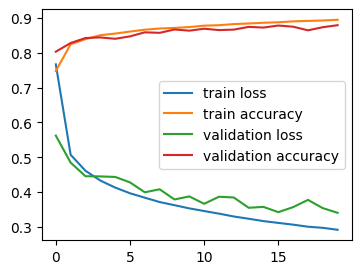

In [62]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(history_train.history["loss"], label="train loss")
ax.plot(history_train.history["accuracy"], label="train accuracy")
ax.plot(history_train.history["val_loss"], label="validation loss")
ax.plot(history_train.history["val_accuracy"], label="validation accuracy")
ax.legend()

*Step 6: [Evaluate Model](https://keras.io/api/models/model_training_apis/)*


In [63]:
history_test = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3602 - accuracy: 0.8714


Step 7: Predict Model

In [64]:
pred = x_test[0:4,:,:]
pred_x_test = model.predict(pred).round(3)
labels_pred = np.argmax(pred_x_test, axis=1)
print(f"pred.shape: {pred.shape}")
print(f"pred_x_test: {pred_x_test}")
print(f"labels_pred: {labels_pred}, y_test: {y_test[0:4]}")

1/1 [==============================] - 0s 81ms/step
pred.shape: (4, 28, 28)
pred_x_test: [[0.    0.    0.    0.    0.    0.031 0.    0.036 0.002 0.931]
 [0.    0.    0.999 0.    0.001 0.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]]
labels_pred: [9 2 1 1], y_test: [9 2 1 1]


**[Convolutional Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d) ([CNN](https://keras.io/api/layers/convolution_layers/convolution2d/))**<br/>
[MaxPooling2D layer](https://keras.io/api/layers/pooling_layers/max_pooling2d/)<br/>

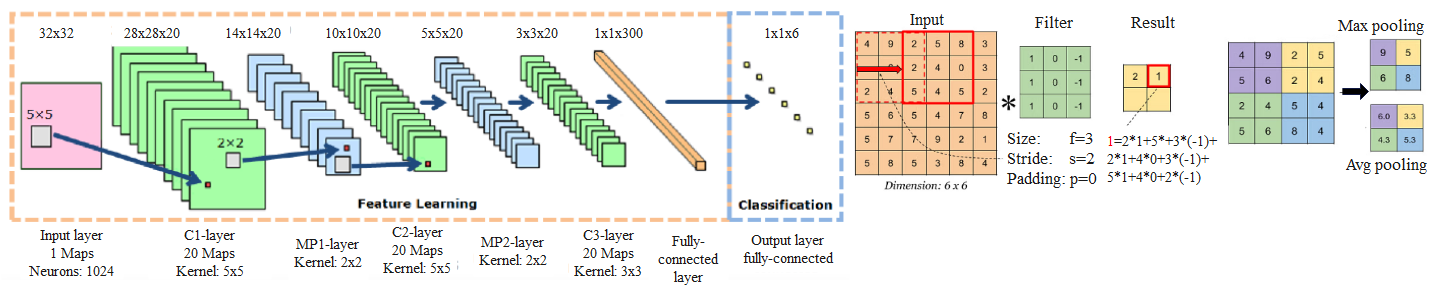

- **Filter/Kernel:** A small matrix of weights that is convolved with the input data to produce a feature map.
- **Stride:** The step size used to move the filter/kernel during the convolution operation.
- **Pooling:** This refers to a downsampling process that decreases the feature maps' spatial dimensions by picking out the most crucial or representative values.
  - `Max Pooling:` The input pixel with maximum value is saved in the output matrix.
  - `Average Pooling:` The average of input pixels is saved in the output matrix. 
- **Padding:** Adding additional pixels or values around the input data to preserve spatial information during convolution.
  - `Valid Padding` skips the last convolution if the filter falls outside the input matrix. 
  - `Same Padding` ensures that the input and output layer sizes are the same. 
  - `Full Padding` adds a border of zeros to the input matrix, increasing the output size.
- **Convolutional Layer:** A CNN layer applies convolutional operations to the input data by using one or multiple filters/kernels.
- **Feature Map:** The output of a convolutional layer, which represents the presence of specific features in the input data.
- **Pooling Layer:** In a CNN, there is a layer that conducts pooling operations to decrease the spatial dimensions and capture significant characteristics from the feature maps.

In [21]:
# ================================================= Step 3.1: Building the network =================================================
model = keras.models.Sequential([keras.layers.Conv2D(filters=50, kernel_size=5, strides=(1, 1), 
        activation="relu", padding="same", input_shape=[x_train.shape[1],x_train.shape[2],1])
                                

])


model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 50)        1300      
                                                                 
Total params: 1300 (5.08 KB)
Trainable params: 1300 (5.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
